# About Dataset
The dataset is in .xlsx (Microsoft Excel) format and consists of ```12,690 rows with 9 features``` as explained below:
- TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
- RESTAURANT_ID: A unique ID for each restaurant.
- CUISINES: The variety of cuisines that the restaurant offers.
- TIME: The open hours of the restaurant.
- CITY: The city in which the restaurant is located.
- LOCALITY: The locality of the restaurant.
- RATING: The average rating of the restaurant by customers.
- VOTES: The overall votes received by the restaurant.
- COST: The average cost of a two-person meal.

Since, the target COST is of contineous type, therefore, it is a Regression Problem.

# Loading Dataset

In [1]:
import pandas as pd
import re
df_rfc = pd.read_excel('Data_Train.xlsx',sheet_name='Sheet1')

#Interpreting dataset
df_rfc

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


### Remarks:
- There are 12690 rows and 9 columns.

In [2]:
#Checking general information of dataset
df_rfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


### Remarks:
- Feature ```RESTAURANT_ID and  COST``` are of contineous type while others are of descrete type which needs to be handled accordingly.
- Feature ```CITY, LOCALITY, RATING and VOTES``` has null values and needs to be treated accordingly.

# Preparing Dataset

In [75]:
import numpy as np
#copying dataset into new dataframe object
df = df_rfc.copy()

### ```checking feature TITLE```

In [4]:
x = 'TITLE'
#checking for unique values
df[x].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

### Remarks:
- values are stored in comma seperated form, therefore, splitting these values into different columns and extracting the unique values.

In [5]:
#Splitting feature TITLE
x = 'TITLE'
temp_df = df[x].str.split(',',expand=True)
unique_values = []
for i in temp_df.columns:
    unique_values = np.append(unique_values,temp_df[i].str.strip().unique())

unique_title = pd.unique(unique_values)
unique_title = unique_title[(unique_title != 'None')&(unique_title != None)&(unique_title !='')]
print(unique_title)

#Seperating unique values into different columns
for i in unique_title:
    col = "is "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y else 'No')
    
#Interpreting first 5 rows after extraction
df.head(5)

['CASUAL DINING' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ' 'MICROBREWERY'
 'BAKERY' 'BAR' 'PUB' 'BEVERAGE SHOP' 'FINE DINING' 'SWEET SHOP'
 'FOOD COURT' 'LOUNGE' 'FOOD TRUCK' 'MESS' 'KIOSK' 'CLUB' 'DHABA'
 'MEAT SHOP' 'COCKTAIL BAR' 'CONFECTIONERY' 'PAAN SHOP' 'IRANI CAFE']


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,is CASUAL DINING,...,is FOOD TRUCK,is MESS,is KIOSK,is CLUB,is DHABA,is MEAT SHOP,is COCKTAIL BAR,is CONFECTIONERY,is PAAN SHOP,is IRANI CAFE
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,Yes,...,No,No,No,No,No,No,No,No,No,No
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,Yes,...,No,No,No,No,No,No,No,No,No,No
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,Yes,...,No,No,No,No,No,No,No,No,No,No
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,No,...,No,No,No,No,No,No,No,No,No,No
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,No,...,No,No,No,No,No,No,No,No,No,No


### ```checking feature CUISINES```

In [6]:
x = 'CUISINES'
#checking for unique values
df[x].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

### Remarks:
- values are stored in comma seperated form, so, splitting them to different columns would give more information.

In [7]:
#Splitting feature CUISINES
x = 'CUISINES'
temp_df = df[x].str.split(',',expand=True)
unique_values = []
for i in temp_df.columns:
    unique_values = np.append(unique_values,temp_df[i].str.strip().unique())

unique_cuisines = pd.unique(unique_values)
unique_cuisines = unique_cuisines[(unique_cuisines != 'None')&(unique_cuisines != None)&(unique_cuisines !='')]
print(unique_cuisines)

#Seperating unique values into different columns
for i in unique_cuisines:
    col = "is "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y else 'No')
    
#Interpreting first 5 rows after extraction
df.head(5)

['Malwani' 'Asian' 'North Indian' 'Tibetan' 'Desserts' 'Cafe' 'Bar Food'
 'South Indian' 'Fast Food' 'Arabian' 'Maharashtrian' 'Parsi' 'Chinese'
 'Bakery' 'Continental' 'Andhra' 'Biryani' 'Italian' 'Finger Food'
 'Beverages' 'American' 'European' 'Ice Cream' 'Kerala' 'Seafood' 'Pizza'
 'Mithai' 'Rolls' 'Thai' 'Juices' 'Burger' 'Hyderabadi' 'Mediterranean'
 'Gujarati' 'Mexican' 'Healthy Food' 'Sandwich' 'Indian' 'Coffee'
 'Indonesian' 'BBQ' 'Bihari' 'Lebanese' 'Bengali' 'Chettinad' 'Mughlai'
 'Street Food' 'Rajasthani' 'Portuguese' 'Oriya' 'Japanese' 'Ethiopian'
 'Modern Indian' 'Spanish' 'Russian' 'Mangalorean' 'Turkish' 'Steak'
 'Kebab' 'Wraps' 'Momos' 'Naga' 'Burmese' 'Malaysian' 'Korean' 'Tea'
 'Sindhi' 'Vietnamese' 'Goan' 'French' 'Raw Meats' 'Salad'
 'Middle Eastern' 'Kashmiri' 'North Eastern' 'Sri Lankan' 'Sushi'
 'Tex-Mex' 'Afghan' 'Konkan' 'Bubble Tea' 'African' 'German' 'Drinks Only'
 'Paan' 'Assamese' 'Nepalese' 'Hot dogs' 'Cafe Food' 'Awadhi' 'British'
 'Bohri' 'Armenian' 'S

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,is CASUAL DINING,...,is Peruvian,is Mongolian,is Modern Australian,is Coffee and Tea,is Poké,is Cuisine Varies,is Jewish,is Satay,is Vegan,is Dumplings
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,Yes,...,No,No,No,No,No,No,No,No,No,No
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,Yes,...,No,No,No,No,No,No,No,No,No,No
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,Yes,...,No,No,No,No,No,No,No,No,No,No
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,No,...,No,No,No,No,No,No,No,No,No,No
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,No,...,No,No,No,No,No,No,No,No,No,No


### ```checking feature TIME```

In [8]:
#Checking feature TIME for unique values
x = 'TIME'
df[x].value_counts()


11am – 11pm (Mon-Sun)                                   1415
12noon – 12midnight (Mon-Sun)                            469
12noon – 11pm (Mon-Sun)                                  407
11am – 12midnight (Mon-Sun)                              310
10am – 10pm (Mon-Sun)                                    221
                                                        ... 
11:45am – 1am (Mon-Sun)                                    1
Closed (Mon, Sat), 6am – 10pm (Tue, Wed, Thu, Fri...       1
11:45am – 12:45AM (Mon-Sun)                                1
6am – 8:30pm (Mon-Sat),6am – 12noon (Sun)                  1
1:30pm – 4pm, 6pm – 11:30pm (Mon, Wed, Thu, Fri...         1
Name: TIME, Length: 2689, dtype: int64

### Remarks:
- This feature is quite complex as it contains **2689 unique values**. So, dropping this feature from dataset.

### ```checking feature CITY```

In [9]:
#checking for unique values
x = 'CITY'
df[x].value_counts()

Chennai             2174
Bangalore           2149
Hyderabad           1819
Mumbai              1722
New Delhi           1321
                    ... 
Karol Bagh             1
Karnataka 560102       1
Chembur.               1
New Delhi-110024       1
chennai                1
Name: CITY, Length: 359, dtype: int64

In [10]:
#Splitting feature CITY into different columns by space
x = 'CITY'
temp_df = df[x].str.split(' ',expand=True)
temp_df.replace(np.nan,'Unkown',inplace=True)

for i in temp_df.columns:
    temp_df[i]=temp_df[i].apply(lambda y: y.title() if len(y)>3 and y.isalpha() else 'Unkown')
    
unique_values = []
for i in temp_df.columns:
    unique_values = np.append(unique_values,pd.unique(temp_df[i]))

unique_city = pd.unique(unique_values)
print(unique_city)

#Seperating unique values into different columns
df[x].replace(np.nan,'Unkown',inplace=True)
for i in unique_city:
    col = "in "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y.title() else 'No')
    
#Interpreting first 5 rows after extraction
df.head(5)

['Thane' 'Chennai' 'Mumbai' 'Bangalore' 'Gurgaon' 'Hyderabad' 'Kochi'
 'Andheri' 'Unkown' 'Malad' 'Bangalor' 'Navi' 'Bandra' 'Delhi' 'Noida'
 'Secunderabad' 'India' 'Madhuranagar' 'Faridabad' 'Maharashtra'
 'Telagana' 'Ghaziabad' 'Karnataka' 'Kerala' 'Edappally' 'Kadavanthra'
 'Ernakulam' 'Bengalore' 'Near' 'Kilpauk' 'Bengaluru' 'Kothaguda'
 'Goregaon' 'Banglore' 'Tamil' 'Kakkanad' 'Outer' 'Mulund' 'Telangana'
 'Ponnuruni' 'Gachibowli' 'Semmancheri' 'Powai' 'Dombivali' 'Kandivali'
 'Dewan' 'Gurugram' 'Sector' 'Kaloor' 'Besant' 'Arumbakkam' 'Adjacent'
 'Dwarka' 'Kalyan' 'Avadi' 'Kondapur' 'Mehdipatnam' 'Gandipet' 'Velachery'
 'Pallavaram' 'Vijaya' 'Metro' 'Madhapur' 'Sarjapur' 'Whitefield' 'Rohini'
 'Karol' 'Perungudi' 'Thykoodam' 'Greater' 'Khairatabad' 'Chullickal'
 'Grant' 'Hitech' 'West' 'Chander' 'Nedumbassery' 'Naya' 'Pitampura'
 'Lower' 'Rajiv' 'Medavakkam' 'Sathya' 'Behind' 'Palarivattom' 'Brigade'
 'Virar' 'Aluva' 'Marine' 'Nallathambi' 'Citypark' 'Bhayandar'
 'Thammenahalli' '

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,is CASUAL DINING,...,in Loyola,in Ware,in Ozone,in Station,in Restaurant,in Ever,in Paharganj,in Degree,in Green,in Apartment
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,Yes,...,No,No,No,No,No,No,No,No,No,No
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,Yes,...,No,No,No,No,No,No,No,No,No,No
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,Yes,...,No,No,No,No,No,No,No,No,No,No
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,No,...,No,No,No,No,No,No,No,No,No,No
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,No,...,No,No,No,No,No,No,No,No,No,No


### ```checking feature LOCALITY```

In [76]:
#Checking feature LOCALITY for unique values
x = 'LOCALITY'
u_locality = df[x].value_counts()
u_locality

Gachibowli                           166
Indiranagar                          138
Edappally                            122
Kakkanad                             121
HSR                                  120
                                    ... 
Manjapetty Aluva Perumbavoor Road      1
Tambaram Senatorium                    1
South Extension Part-2                 1
Near City Centre Metro                 1
Chettipunyam                           1
Name: LOCALITY, Length: 1416, dtype: int64

### Remarks:
- There are 1416 unique values.

In [77]:
#Checking null values
x='LOCALITY'
df[x].isnull().sum()

98

In [78]:
#Replacing null values with 'Other'
x='LOCALITY'
df[x].replace(np.nan,'Other',inplace=True)

In [79]:
#Replacing all unique values which occurs less than 2 times with 'Other' and storing it into another variable
x = 'LOCALITY'
df[x]=df[x].apply(lambda y: y if y != 'Other' and u_locality[y]>1 else 'Other')
unique_locality = df[x].value_counts()
unique_locality.index

Index(['Other', 'Gachibowli', 'Indiranagar', 'Edappally', 'Kakkanad', 'HSR',
       'Madhapur', 'Kukatpally', 'Marathahalli', 'Jubilee Hills',
       ...
       'Muttukadu', '4 Bunglows', 'Bolgatty', 'Sector 55', 'Sahakar Nagar',
       'Ejipura', 'Vazhakkala', 'Rajendra Place', 'Okhla Phase 2',
       'Punjabi Bagh West'],
      dtype='object', length=715)

In [15]:
#Seperating unique values into different columns with Yes or No values
x = 'LOCALITY'
for i in unique_locality.index:
    col = "in "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y else 'No')
    
#Interpreting first 5 rows after splitting LOCALITY
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,is CASUAL DINING,...,in Muttukadu,in 4 Bunglows,in Bolgatty,in Sector 55,in Sahakar Nagar,in Ejipura,in Vazhakkala,in Rajendra Place,in Okhla Phase 2,in Punjabi Bagh West
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,Yes,...,No,No,No,No,No,No,No,No,No,No
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,Yes,...,No,No,No,No,No,No,No,No,No,No
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,Yes,...,No,No,No,No,No,No,No,No,No,No
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,No,...,No,No,No,No,No,No,No,No,No,No
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,No,...,No,No,No,No,No,No,No,No,No,No


### ```checking feature RATING```

In [16]:
#Checking for unique values
x = 'RATING'
df[x].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

### Remarks:
- this feature contains numeric as well as alphabetic values, therefore, proper conversion is required.

In [17]:
#Extracting rating and storing as float
x = 'RATING'
rating=df[x].str.extract(r'([-+]?\d*\.\d+|d+)').astype('float64')
rating

,0
0,3.6
1,4.2
2,3.8
3,4.1
4,3.8
...,...
12685,3.8
12686,4.3
12687,4.0
12688,3.5


In [18]:
#Checking for null values and replacing them with mean value as the rating lies in a specific range.
print("Null Values: ",rating[0].isnull().sum())
rating[0].replace(np.nan,rating[0].mean(),inplace=True)
#Replacing feature RATING with rating[0]
df[x] = rating[0]

print("Null Values after Replacement: ",df[x].isnull().sum())

Null Values:  1204
Null Values after Replacement:  0


### Remarks:
   - null values were present and has been replaced with mean of the value.

### ```checking feature VOTES```

In [19]:
#checking for unique values
x = 'VOTES'
df[x].value_counts()

44 votes      71
29 votes      66
28 votes      66
38 votes      65
35 votes      64
              ..
2310 votes     1
3765 votes     1
3048 votes     1
2795 votes     1
6508 votes     1
Name: VOTES, Length: 1847, dtype: int64

### Remarks:
- values are stored in (xx votes) pattern, therefore, extracting the xx would give more information.

In [20]:
#Extracting VOTES and storing as float
x = 'VOTES'
votes=df[x].str.extract(r'(\d+)').astype('float64')
votes

,0
0,49.0
1,30.0
2,221.0
3,24.0
4,165.0
...,...
12685,546.0
12686,1214.0
12687,608.0
12688,32.0


In [21]:
#Checking for null values and replacing them with mean value as the votes lies in a specific range.
print("Null Values: ",votes[0].isnull().sum())
votes[0].replace(np.nan,votes[0].mean(),inplace=True)
#Replacing feature VOTES with votes[0]
df[x] = votes[0]

print("Null Values after Replacement: ",df[x].isnull().sum())

Null Values:  1204
Null Values after Replacement:  0


### Remarks:
- null values were present and has been replaced with mean of the value.

### ```checking feature COST```

In [22]:
#Checking for null values
x = 'COST'
print("Null Values: ",df[x].isnull().sum())

Null Values:  0


### Remarks:
- No null values are present.

### ```checking final shape of dataset```

In [23]:
df.shape

(12690, 1087)

### Remarks:
- There are 12690 rows and 1087 columns present in dataset.
- Dropping features ```TITLE, RESTAURANT_ID, CUISINES, TIME, CITY, LOCALITY``` as these were splitted into different columns.

In [24]:
#Dropping features
drop_feature = ['TITLE','RESTAURANT_ID','CUISINES','TIME','CITY','LOCALITY']
df_new = df.drop(columns=drop_feature)
df_new.head()

,RATING,VOTES,COST,is CASUAL DINING,is QUICK BITES,is DESSERT PARLOR,is CAFÉ,is MICROBREWERY,is BAKERY,is BAR,...,in Muttukadu,in 4 Bunglows,in Bolgatty,in Sector 55,in Sahakar Nagar,in Ejipura,in Vazhakkala,in Rajendra Place,in Okhla Phase 2,in Punjabi Bagh West
0,3.6,49.0,1200,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,4.2,30.0,1500,Yes,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
2,3.8,221.0,800,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,4.1,24.0,800,No,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,3.8,165.0,300,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


# Exploratory Data Analysis (EDA)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

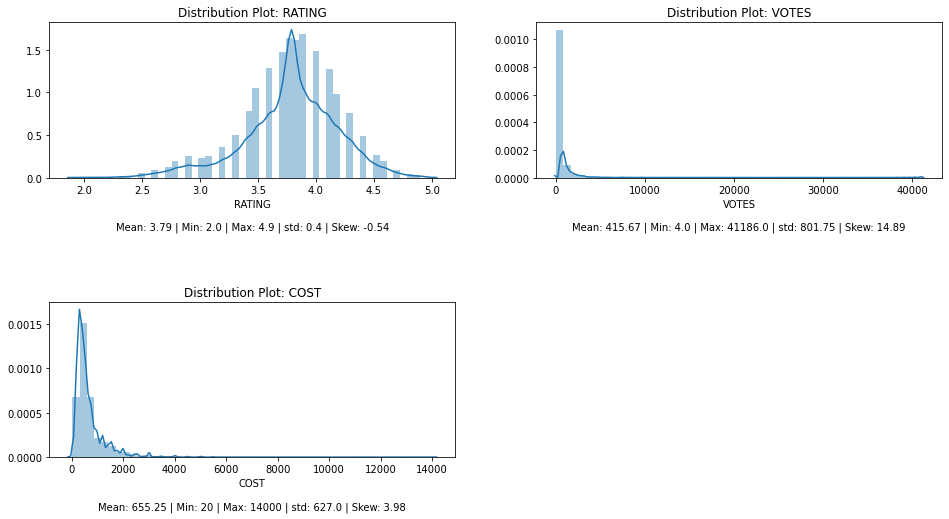

In [26]:
#Checking data distribution in contineous feature
cont_feature = df_new.columns[df_new.dtypes != object]
cols = 2
rows = len(cont_feature)//cols
if rows % cols != 0:
    rows += 1

fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(hspace=0.8)
k=1
for i in cont_feature:
    axes = plt.subplot(rows,cols,k)
    sns.distplot(df_new[i],ax=axes)
    axes.set_title(f"Distribution Plot: {i}")
    me = round(df[i].mean(),2)
    mn = round(df[i].min(),2)
    mx = round(df[i].max(),2)
    st = round(df[i].std(),2)
    sk = round(df[i].skew(),2)
    axes.set_xlabel(f"{i}\n\nMean: {me} | Min: {mn} | Max: {mx} | std: {st} | Skew: {sk}")
    k += 1
    
plt.show()

### Remarks:
**```for feature RATING:```**
- Data is somewhat distributed normally but not in bell curve.
- Average rating is: 3.79
- Minimum rating is: 2.0
- Maximum rating is: 4.9
- Standard deviation is lower (0.4) which indicates data is not spreaded.
- Skewness (-0.54) indicates, data is negatively skewed but is in negligible range.

**```for feature VOTES:```**
- Data is not distributed normally or not in bell curve.
- Average votes are: 415
- Minimum votes are: 4
- Maximum votes are: 41186
- Standard deviation is normal (801.75) which indicates data is not much spreaded.
- Skewness (14.89) indicates, data is right skewed and needs to be treated accordingly.

**```for feature COST:```**
- Data is somewhat distributed normally but not in bell curve.
- Average cost is: 655.25
- Minimum cost is: 20
- Maximum cost is: 14000
- Standard deviation is normal (627) which indicates data is not much spreaded.
- Skewness (3.98) indicates, data is positively skewed but is in negligible range.

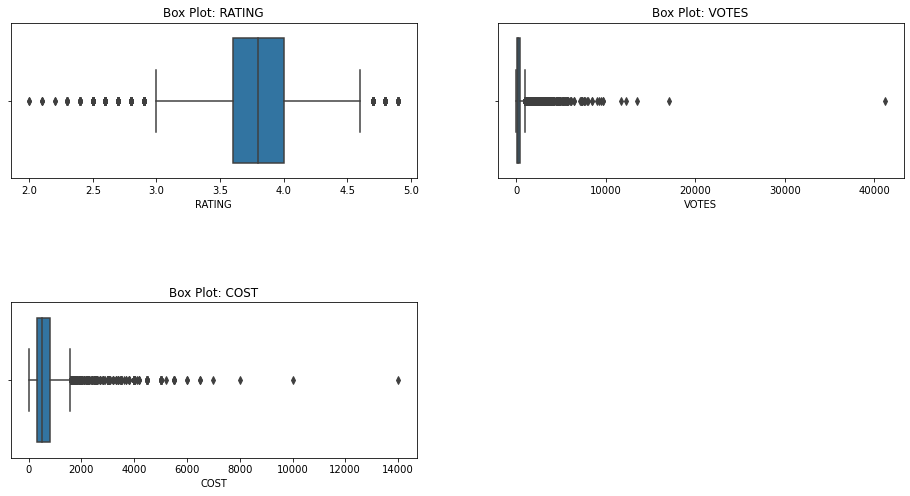

In [27]:
#Checking contineous features with box-plot
cont_feature = df_new.columns[df_new.dtypes != object]
cols = 2
rows = len(cont_feature)//cols
if rows % cols != 0:
    rows += 1

fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(hspace=0.8)
k=1
for i in cont_feature:
    axes = plt.subplot(rows,cols,k)
    sns.boxplot(df_new[i],ax=axes)
    axes.set_title(f"Box Plot: {i}")
    
    k += 1
    
plt.show()

### Remarks:
- Box plots shows presence of outliers in all contineous features and needs to be treated accordingly.

## BiVariate Analysis

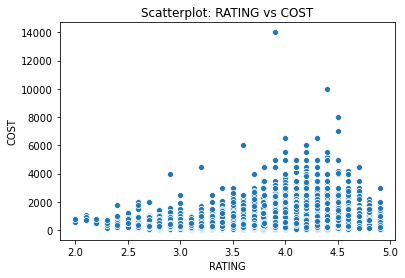

In [28]:
#Checking relationship between rating and cost.
x = 'RATING'
y = 'COST'
sns.scatterplot(x,y,data=df_new)
plt.title(f"Scatterplot: {x} vs {y}")
plt.show()

### Remarks:
- As rating increase upto 4.5, cost also increases and then starts decreases towards rating upto 5.

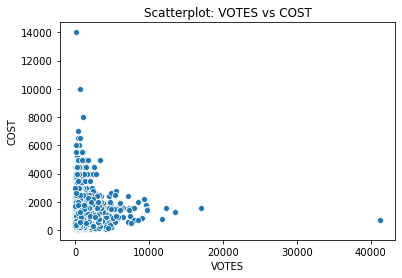

In [29]:
#Checking relationship between votes and cost.
x = 'VOTES'
y = 'COST'
sns.scatterplot(x,y,data=df_new)
plt.title(f"Scatterplot: {x} vs {y}")
plt.show()

### Remarks:
- cost tends to decrease as the votes increases.

## Multi-Variate Analysis

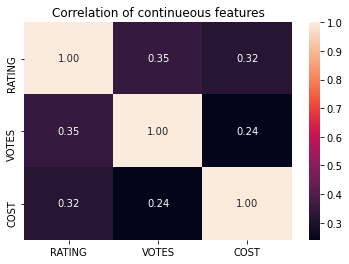

In [30]:
#Checking correlation of contineous features and interpreting using heatmap
df_corr = df_new.corr()
sns.heatmap(df_corr,annot=True,fmt=".2f")
plt.title("Correlation of continueous features")
plt.show()

### Remarks:
- All the contineous features have positively good correlation with each other.

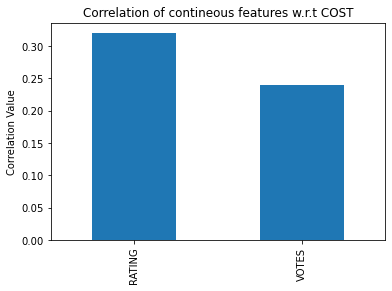

In [31]:
#Checking correlation w.r.t cost using bar plot
df_corr['COST'].sort_values(ascending=False).drop('COST').plot.bar()
plt.title("Correlation of contineous features w.r.t COST")
plt.ylabel("Correlation Value")
plt.show()

### Remarks:
- Feature RATING and VOTES are positively good correlated with COST.

# Preparing Data for Model

In [32]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, power_transform
from scipy.stats import zscore

## 1. Label Encoding

In [33]:
#Encoding all categorical features using OrdinalEncoder
cat_feature = df_new.columns[df_new.dtypes == object]
df_enc = df_new.copy()
ec = OrdinalEncoder()
for i in cat_feature:
    df_enc[i] = ec.fit_transform(np.array(df_new[i]).reshape(-1,1))
    
#Interpreting dataset after encoding
df_enc.head()

,RATING,VOTES,COST,is CASUAL DINING,is QUICK BITES,is DESSERT PARLOR,is CAFÉ,is MICROBREWERY,is BAKERY,is BAR,...,in Muttukadu,in 4 Bunglows,in Bolgatty,in Sector 55,in Sahakar Nagar,in Ejipura,in Vazhakkala,in Rajendra Place,in Okhla Phase 2,in Punjabi Bagh West
0,3.6,49.0,1200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.2,30.0,1500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8,221.0,800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.1,24.0,800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8,165.0,300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Removing Outliers

In [34]:
#Checking and removing outliers using zscore (threshold value -3 to +3)
z = np.abs(zscore(df_enc))

#printing location of outliers
np.where(z>3)

(array([    0,     0,     0, ..., 12688, 12688, 12689], dtype=int64),
 array([ 26,  94, 542, ...,  72, 674, 610], dtype=int64))

In [35]:
#Removing outliers
df_wo = df_enc[(z<=3).all(axis=1)]

print(f"Original Shape: {df_enc.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df_enc)-len(df_wo))*100/len(df_enc)}%")

Original Shape: (12690, 1081)
New Shape: (0, 1081)
% Loss: 100.0%


### Remarks:
- Since, % loss of data is greater than 5, therefore, discarding data without outliers and proceeding with original data.

## 3. Seperating Input and Output/Target Variables

In [36]:
X = df_enc.drop(columns=['COST']) #Input variables
Y = df_enc['COST'] #Output/Target Variables

print(X.shape)
print(Y.shape)

(12690, 1080)
(12690,)


## 4. Skewness

In [37]:
#Checking and treating skewness in contineous features (optimum value -0.5 to +0.5)
cont_f = ['RATING','VOTES']
#Skewness
X[cont_f].skew()

RATING    -0.537352
VOTES     14.890494
dtype: float64

### Remarks:
- Feature RATING and VOTES has skewed data and needs to be treated.

In [38]:
for i in cont_f:
    if np.abs(X[i].skew()) > 0.5:
        X[i] = power_transform(np.array(X[i]).reshape(-1,1))
        
#Re-Checking after treatment
X[cont_f].skew()

RATING    0.028430
VOTES    -0.007247
dtype: float64

## 5. Scaling Data

In [39]:
#scaling contineous features
sc = StandardScaler()
for i in cont_f:
    X[i] = sc.fit_transform(np.array(X[i]).reshape(-1,1))
    

# Finding Best Model

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
import timeit
#Defining function for best random state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_mScore = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        temp_r2Score = r2_score(y_test,predict_y)
        if temp_r2Score>best_mScore:
            best_mScore = temp_r2Score
            best_rState = i
            
    return best_rState,best_mScore


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        
        if i == 2:
            best_cvScore = temp_cvScore
            best_cv = i
            
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
          
    return best_cv,best_cvScore

#Defining function for building models
def build_model(models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        print(f"Processing {i}...")
        
        #Start time
        start_time = timeit.default_timer()
        
        #Finding the best random_state for train test split
        best_rState, best_mScore = get_best_rstate(r_range,models[i]["name"],x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #End time
        end_time = timeit.default_timer()
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        
        r2Score = r2_score(y_test,predict_y)
        mse = mean_squared_error(y_test,predict_y)
        mae = mean_absolute_error(y_test,predict_y)
        
        #Storing metrics
        models[i]['initial_r2_score'] = best_mScore
        models[i]['r2_score'] = r2Score
        models[i]['mse'] = mse
        models[i]['mae'] = mae
        models[i]['rmse'] = np.sqrt(mse)
        
        #Storing model specs.
        models[i]["random_state"] = best_rState
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        models[i]["build_time"] = end_time - start_time
        
        print(f"\tCompleted: [in {end_time-start_time}s]\n")
    return models.copy();

#Function Displaying model performance and comparing it to select the best model.
def model_performance(build_models):
    model_names = []
    model_r2Scores = []
    model_cvScores = []
    model_buildTimes = []
    for i in build_models:
        model = build_models[i]
        print(f"START: {i}\n")
        print(f"\tBest random_state: {model['random_state']} with best r2_score: {model['initial_r2_score']}\n")
        print(f"\tBest CV: {model['cv']} with best cross_val_score: {model['cross_val_score']}\n")
        print(f"\tBest Parameters: {model['gscv'].best_params_}\n\n")
        print(f"----Final Performance----")
        print(f"R2 Score: {round(model['r2_score']*100,2)}%\n")
        print(f"MSE: {model['mse']}\n")
        print(f"RMSE:{model['rmse']}\n")
        print(f"MAE: {model['mae']}\n")
        print(f"BuildTime: {model['build_time']}\n")
        print(f"END: {i}\n\n\n")

        model_names.append(i)
        model_r2Scores.append(model['r2_score'])
        model_cvScores.append(model['cross_val_score'])
        model_buildTimes.append(model['build_time'])

    d_cmp = pd.DataFrame({"Name":model_names,"r2_score":model_r2Scores,"cross_val_score":model_cvScores,"build_time(sec)":model_buildTimes})
    d_cmp['Difference'] = d_cmp['r2_score']-d_cmp['cross_val_score']
    print(d_cmp)

## Preparing Model List and Testing to get Best Model

In [56]:
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LinearRegression, Lasso

#Preparing List of Models with parameters
models = {
    "LinearRegression":{
        "name": LinearRegression(),
        "parameters":{
            "fit_intercept": [True,False],
            "normalize": [True,False]
        }
    },
}

In [43]:
#Building and Testing models
build_models = build_model(models,X,Y)

Processing LinearRegression...
	Completed: [in 4269.2861654s]



In [44]:
#Displaying model performance
model_performance(build_models)

START: LinearRegression

	Best random_state: 5 with best r2_score: 0.732308057697959

	Best CV: 17 with best cross_val_score: -3.4166731841123533e+19

	Best Parameters: {'fit_intercept': False, 'normalize': True}


----Final Performance----
R2 Score: 72.96%

MSE: 102645.63390161823

RMSE:320.38357308329375

MAE: 202.08756511112045

BuildTime: 4269.2861654

END: LinearRegression



               Name  r2_score  cross_val_score  build_time(sec)    Difference
0  LinearRegression  0.729639    -3.416673e+19      4269.286165  3.416673e+19


## Using PCA (Principle Component Analysis)

In [45]:
from sklearn.decomposition import PCA

In [46]:
#Decomposing Input Variable X with different n_components and testing model for best performance
n = [10,50,100,150,200]
for i in n:
    pca = PCA(n_components=i)
    pca_X = pca.fit_transform(X)
    build_pca = build_model(models,pca_X,Y)
    print(f"For n_components: {i}======")
    model_performance(build_pca)

Processing LinearRegression...
	Completed: [in 10.011553600000298s]

For n_components: 10======
START: LinearRegression

	Best random_state: 0 with best r2_score: 0.3306018471234975

	Best CV: 18 with best cross_val_score: 0.29106731204130765

	Best Parameters: {'fit_intercept': True, 'normalize': False}


----Final Performance----
R2 Score: 33.06%

MSE: 232370.328896443

RMSE:482.0480566255226

MAE: 284.07733106540513

BuildTime: 10.011553600000298

END: LinearRegression



               Name  r2_score  cross_val_score  build_time(sec)  Difference
0  LinearRegression  0.330602         0.291067        10.011554    0.039535
Processing LinearRegression...
	Completed: [in 37.53752160000022s]

For n_components: 50======
START: LinearRegression

	Best random_state: 42 with best r2_score: 0.7041918109431684

	Best CV: 14 with best cross_val_score: 0.6619850694706325

	Best Parameters: {'fit_intercept': True, 'normalize': True}


----Final Performance----
R2 Score: 70.42%

MSE: 104584.923909

### Remarks:
- **Model score with decomposition is optimum at *n_components=100* with r2_score: 73.21% which almost equivalent to model score with original input.**
- **```Continuing with PCA(n_components=100)```**

### Building Final Model List with PCA(n_components=100)

In [57]:
pca = PCA(n_components=100)
pca_X = pca.fit_transform(X)
#Model lists
models = {
    "LinearRegression":{
        "name": LinearRegression(),
        "parameters":{
            "fit_intercept": [True],
            "normalize": [True]
        }
    },
    "Lasso":{
        "name": Lasso(),
        "parameters":{
            "alpha": [0.0001,0.001],
            "fit_intercept": [True],
            "selection": ['cyclic','random']
        }
    }
}

In [58]:
#Building and Testing Final model using PCA
final_build = build_model(models,pca_X,Y)

Processing LinearRegression...
	Completed: [in 52.72074889999931s]

Processing Lasso...
	Completed: [in 66.06136200000037s]



In [59]:
#Displaying model performances
model_performance(final_build)

START: LinearRegression

	Best random_state: 59 with best r2_score: 0.7324243543594329

	Best CV: 18 with best cross_val_score: 0.6770463182088224

	Best Parameters: {'fit_intercept': True, 'normalize': True}


----Final Performance----
R2 Score: 73.24%

MSE: 92541.8853490735

RMSE:304.2069778112815

MAE: 192.92895593949933

BuildTime: 52.72074889999931

END: LinearRegression



START: Lasso

	Best random_state: 59 with best r2_score: 0.7188173645598405

	Best CV: 18 with best cross_val_score: 0.677050342573987

	Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'selection': 'random'}


----Final Performance----
R2 Score: 73.24%

MSE: 92542.43636509177

RMSE:304.20788346966253

MAE: 192.93235261809804

BuildTime: 66.06136200000037

END: Lasso



               Name  r2_score  cross_val_score  build_time(sec)  Difference
0  LinearRegression  0.732424         0.677046        52.720749    0.055378
1             Lasso  0.732423         0.677050        66.061362    0.055372


### Remarks:
**From about tested models, ```Lasso performs better with r2_score: 73.24% and cross_val_score: 67.71%```.**

# Model Saving or Serialization

In [60]:
import joblib
#Saving final model
final_model = final_build['Lasso']
filename = 'restaurant_food_cost.obj'
joblib.dump(final_model['gscv'].best_estimator_,open(filename,'wb'))

# Conclusion

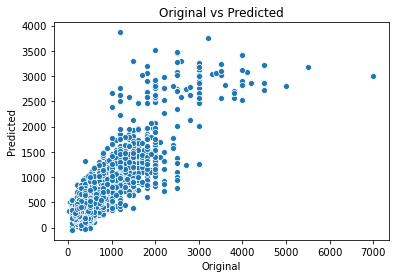

In [61]:
#Ploting Original and Predicted data on scatterplot
original = final_model['y_test']
predict = final_model['predict_y']
sns.scatterplot(original,predict)
plt.title("Original vs Predicted")
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

### Final Remarks:
> Final model, **Lasso performs with r2_score: 73.24% and cross_val_score: 67.71%** and can be improved further by training with more specific data.

# Model Prediction for Test Data
## Preprocessing Pipeline:
- Load Test Dataset
- Extract Informations from feature:
    - ```TITLE, CUISINES, CITY, LOCALITY, RATING, VOTES```
- Treat Null Values
- Encode Discrete Features (using OrdinalEncoder)
- Remove Outliers using zscore
- Treat skewness in contineous features using power_transform
- Scale contineous feature data using StandardScaler
- Apply PCA(n_components=100)
- Load Serialized Model and Make Prediction for Test Data

In [94]:
#1. Loading Test Data
df_test = pd.read_excel('Data_Test.xlsx',sheet_name='Sheet1')
df = df_test.copy()

#2. A. Extracting Information from TITLE
x = 'TITLE'
#Seperating unique values into different columns
for i in unique_title:
    col = "is "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y else 'No')
    
#2. B. Extracting Information from CUISINES
x = 'CUISINES'
#Seperating unique values into different columns
for i in unique_cuisines:
    col = "is "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y else 'No')
    
#2. C. Extracting Information from CITY
x = 'CITY'
#Seperating unique values into different columns
df[x].replace(np.nan,'Unkown',inplace=True)
for i in unique_city:
    col = "in "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y.title() else 'No')
    
#2. D. Extracting Information from LOCALITY
x = 'LOCALITY'
u_locality = df[x].value_counts()
df[x].replace(np.nan,'Other',inplace=True)
df[x]=df[x].apply(lambda y: y if y != 'Other' and u_locality[y]>1 else 'Other')

#Seperating unique values into different columns with Yes or No values
for i in unique_locality.index:
    col = "in "+i
    df[col] = df[x].apply(lambda y: 'Yes' if i in y else 'No')
    
#2. E. Extracting Information from RATING
x = 'RATING'
#Extracting rating and storing as float
rating=df[x].str.extract(r'([-+]?\d*\.\d+|d+)').astype('float64')
#Checking for null values and replacing them with mean value as the rating lies in a specific range.
rating[0].replace(np.nan,rating[0].mean(),inplace=True)
#Replacing feature RATING with rating[0]
df[x] = rating[0]

#2. F. Extracting Information from VOTES
x = 'VOTES'
#Extracting VOTES and storing as float
votes=df[x].str.extract(r'(\d+)').astype('float64')
#Checking for null values and replacing them with mean value as the votes lies in a specific range.
votes[0].replace(np.nan,votes[0].mean(),inplace=True)
#Replacing feature VOTES with votes[0]
df[x] = votes[0]

#3. Dropping Features
df.drop(columns=drop_feature,inplace=True)

#4. Encoding Descrete Features
#Encoding all categorical features using OrdinalEncoder
cat_feature = df.columns[df.dtypes == object]
df_enc = df.copy()
ec = OrdinalEncoder()
for i in cat_feature:
    df_enc[i] = ec.fit_transform(np.array(df[i]).reshape(-1,1))
    


In [98]:
#5. Removing Outliers
z = np.abs(zscore(df_enc))
df_wo = df_enc[(z<=3).all(axis=1)]
loss = (len(df_enc)-len(df_wo))*100/len(df_enc)
if loss <= 5:
    df_proceed = df_wo
else:
    df_proceed = df_enc
    
#6. Treating skewness in continueous features using power_transform
cont_feature = ['RATING','VOTES']
df_t = df_proceed.copy()
for i in cont_feature:
    if np.abs(df_t[i].skew()) > 0.5:
        df_t[i] = power_transform(np.array(df_proceed[i]).reshape(-1,1))
        
#7. Scaling contineous feature data using StandardScaler
sc_test = StandardScaler()
x_test_scaled = df_t.copy()
for i in cont_feature:
    x_test_scaled[i] = sc_test.fit_transform(np.array(df_t[i]).reshape(-1,1))

In [99]:
#8. Applying PCA with n_components=100
pca = PCA(n_components=100)
pca_test_x = pca.fit_transform(x_test_scaled)

### 9.  Loading Serialized Model and Making Prediction on Test Data

In [103]:
model_file_name = 'restaurant_food_cost.obj'
loaded_model = joblib.load(model_file_name)

#Predicting Test Data
predict_test = loaded_model.predict(pca_test_x)

#Displaying Predicted Data
pred_t = pd.DataFrame({"Predicted_Data": predict_test})
pred_t

,Predicted_Data
0,1845.873520
1,920.740575
2,1135.732267
3,888.369775
4,718.267758
...,...
4226,884.043557
4227,810.888944
4228,9.414347
4229,269.270468


In [104]:
## Saving predicted data to .csv file
pred_t.to_csv('predicted_test_data.csv')